# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dionisius Indra Raditya
- **Email:** indradionisius2710@gmail.com
- **ID Dicoding:** dionisius_indra

## Menentukan Pertanyaan Bisnis

- Pada bulan dan musim apa yang paling banyak memiliki user bike sharing dan bagaimana perbandingannya antara tahun 2011 dan 2012?
- Berapakah jumlah user bike sharing pada tahun 2011 dan 2012 berdasarkan kriteria tertentu seperti penggunaan sepeda pada weekdays, musim tertentu dan kondisi cuaca tertentu

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat Tabel Day
day_df = pd.read_csv('data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat Tabel Hour
hour_df = pd.read_csv('data\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Melihat Tipe Data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengecek tidak ada data yang hilang
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Mengecek data duplikat
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [7]:
# Memuat Statistik Deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Melihat Tipe Data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Mengecek tidak ada data yang hilang
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Mengecek data duplikat
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [11]:
# Memuat Statistik Deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan Tabel day_df

Memperbaiki tipe data variabel "dteday" dari object menjadi datetime

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan Tabel hour_df

Memperbaiki tipe data variabel "dteday" dari object menjadi datetime

In [14]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [18]:
day_df.instant.is_unique

True

In [19]:
day_df.groupby(by="workingday").agg({
    "casual" : ["min","max"],
    "registered" : ["min","max"],
    "cnt" : ["min","max"]
})

casual       registered        cnt      
              min   max        min   max  min   max
workingday                                         
0              54  3410        451  5966  605  8714
1               2  2469         20  6946   22  8362

In [20]:
day_df.groupby(by="weekday").agg({
    "casual" : ["min","max"],
    "registered" : ["min","max"],
    "cnt" : ["min","max"]
})

casual       registered         cnt      
           min   max        min   max   min   max
weekday                                          
0           54  3283        451  5657   605  8227
1            2  3065         20  6435    22  7525
2            9  1348        573  6697   683  7767
3            9  2562        432  6946   441  8173
4           15  1405        416  6781   431  7804
5           38  2469       1129  6917  1167  8362
6           57  3410        570  5966   627  8714

In [21]:
day_df.groupby(by="weathersit").agg({
    "casual" : ["min","max"],
    "registered" : ["min","max"],
    "cnt" : ["min","max"]
})

casual       registered        cnt      
              min   max        min   max  min   max
weathersit                                         
1              15  3410        416  6946  431  8714
2               9  3155        491  6844  605  8362
3               2  1264         20  4324   22  4639

In [22]:
# Mengelompokkan data berdasarkan tahun, bulan, dan musim, kemudian menghitung jumlah pengguna bike sharing
monthly_usage = day_df.groupby(['yr', 'mnth', 'season'])['cnt'].sum().reset_index()

# Menampilkan bulan dan musim dengan jumlah pengguna bike sharing terbanyak
max_monthly_usage = monthly_usage.loc[monthly_usage.groupby(['yr'])['cnt'].idxmax()]

print("Bulan dan musim dengan jumlah pengguna bike sharing terbanyak:")
print(max_monthly_usage)

Bulan dan musim dengan jumlah pengguna bike sharing terbanyak:
    yr  mnth  season     cnt
8    0     7       3  141341
25   1     8       3  214503


### Explore hour_df

In [23]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [25]:
hour_df.instant.is_unique

True

In [26]:
hour_df.groupby(by="workingday").agg({
    "casual" : ["min","max"],
    "registered" : ["min","max"],
    "cnt" : ["min","max"]
})

casual      registered      cnt     
              min  max        min  max min  max
workingday                                     
0               0  367          0  601   1  783
1               0  264          0  886   1  977

In [27]:
# Mengelompokkan data berdasarkan tahun, bulan, dan musim, kemudian menghitung jumlah pengguna bike sharing
monthly_usage = hour_df.groupby(['yr', 'mnth', 'season'])['cnt'].sum().reset_index()

# Menampilkan bulan dan musim dengan jumlah pengguna bike sharing terbanyak
max_monthly_usage = monthly_usage.loc[monthly_usage.groupby(['yr'])['cnt'].idxmax()]

print("Bulan dan musim dengan jumlah pengguna bike sharing terbanyak:")
print(max_monthly_usage)

Bulan dan musim dengan jumlah pengguna bike sharing terbanyak:
    yr  mnth  season     cnt
8    0     7       3  141341
25   1     8       3  214503


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan dan musim apa yang paling banyak memiliki user bike sharing dan bagaimana perbandingannya antara tahun 2011 dan 2012

In [28]:
# Mengelompokkan data berdasarkan tahun, bulan, dan musim, kemudian menghitung jumlah pengguna bike sharing
monthly_usage = day_df.groupby(['yr', 'mnth', 'season'])['cnt'].sum().reset_index()

# Menampilkan bulan dan musim dengan jumlah pengguna bike sharing terbanyak
max_monthly_usage = monthly_usage.loc[monthly_usage.groupby(['yr'])['cnt'].idxmax()]

print("Bulan dan musim dengan jumlah pengguna bike sharing terbanyak:")
print(max_monthly_usage)

Bulan dan musim dengan jumlah pengguna bike sharing terbanyak:
    yr  mnth  season     cnt
8    0     7       3  141341
25   1     8       3  214503


Dari output didapatkan bahwa pada kedua tahun, jumlah pengguna bike sharing terbanyak ada di musim 3 yakni Fall (gugur), maka dapat kita tampilkan data per tahun 

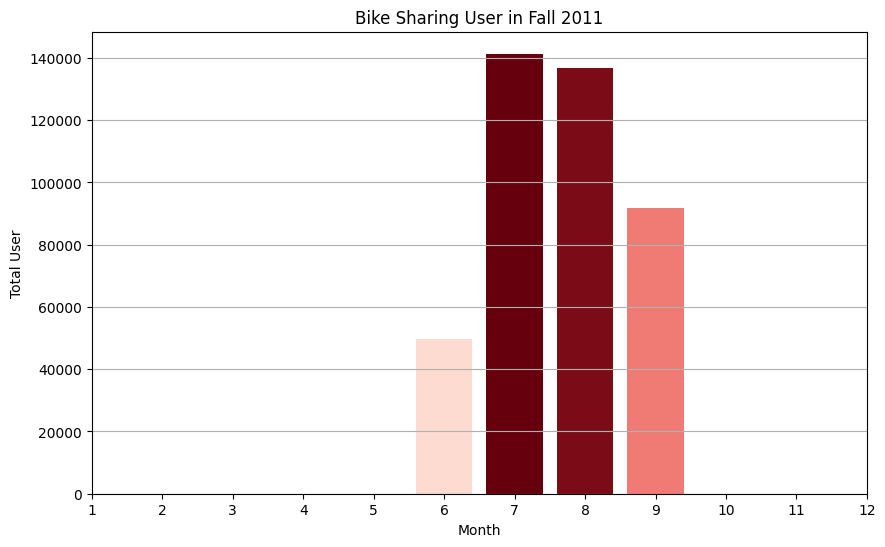

In [29]:
# Mengelompokkan data berdasarkan tahun, bulan, dan musim, kemudian menghitung jumlah pengguna bike sharing
monthly_usage = day_df.groupby(['yr', 'mnth', 'season'])['cnt'].sum().reset_index()

# Memilih data untuk tahun 2011 dan musim 3 (Fall)
fall_usage_2011 = monthly_usage[(monthly_usage['yr'] == 0) & (monthly_usage['season'] == 3)]

# Mencari nilai maksimum jumlah pengguna
max_users = fall_usage_2011['cnt'].max()

# Membuat warna merah untuk diagram
colors = plt.cm.Reds(fall_usage_2011['cnt'] / max_users)

# Membuat diagram batang untuk jumlah pengguna bike sharing di musim Fall tahun 2011
plt.figure(figsize=(10, 6))

# Plot diagram
bars = plt.bar(fall_usage_2011['mnth'], fall_usage_2011['cnt'], color=colors)

# Menambahkan keterangan berdasarkan warna
for bar, cnt in zip(bars, fall_usage_2011['cnt']):
    bar.set_alpha(cnt / max_users)

# Menambahkan keterangan pada diagram
plt.title('Bike Sharing User in Fall 2011')
plt.xlabel('Month')
plt.ylabel('Total User')
plt.xticks(range(1, 13))  # Untuk menampilkan semua bulan dari 1 hingga 12
plt.grid(axis='y')

plt.show()

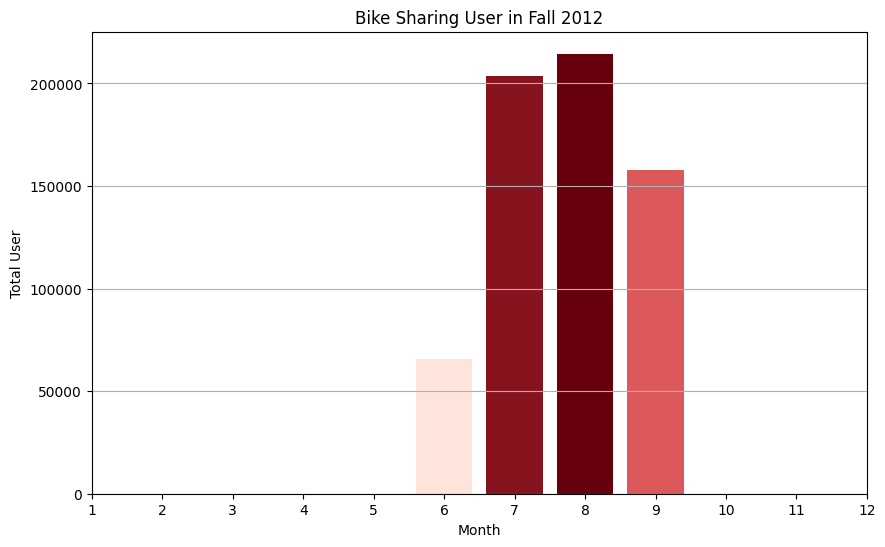

In [30]:
# Mengelompokkan data berdasarkan tahun, bulan, dan musim, kemudian menghitung jumlah pengguna bike sharing
monthly_usage = day_df.groupby(['yr', 'mnth', 'season'])['cnt'].sum().reset_index()

# Memilih data untuk tahun 2012 dan musim 3 (Fall)
fall_usage_2012 = monthly_usage[(monthly_usage['yr'] == 1) & (monthly_usage['season'] == 3)]

# Mencari nilai maksimum jumlah pengguna
max_users = fall_usage_2012['cnt'].max()

# Membuat warna merah untuk diagram
colors = plt.cm.Reds(fall_usage_2012['cnt'] / max_users)

# Membuat diagram batang untuk jumlah pengguna bike sharing di musim gugur tahun 2012
plt.figure(figsize=(10, 6))

# Plot diagram
bars = plt.bar(fall_usage_2012['mnth'], fall_usage_2012['cnt'], color=colors)

# Menambahkan keterangan berdasarkan warna
for bar, cnt in zip(bars, fall_usage_2012['cnt']):
    bar.set_alpha(cnt / max_users)

# Menambahkan keterangan pada diagram
plt.title('Bike Sharing User in Fall 2012')
plt.xlabel('Month')
plt.ylabel('Total User')
plt.xticks(range(1, 13))  # Untuk menampilkan semua bulan dari 1 hingga 12
plt.grid(axis='y')

plt.show()

Perbandingan Jumlah Pengguna Bike Sharing antara tahun 2011 dan 2012 Berdasarkan Musim

<Figure size 1000x600 with 0 Axes>

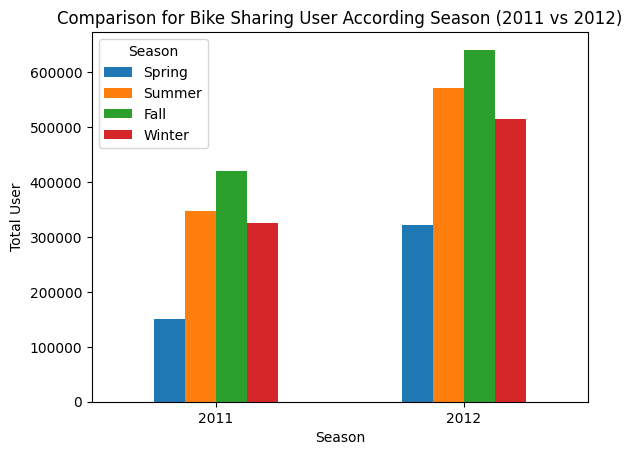

In [31]:
# Mengelompokkan data berdasarkan tahun dan musim, kemudian menghitung jumlah pengguna bike sharing
yearly_seasonal_usage = day_df.groupby(['yr', 'season'])['cnt'].sum().unstack()

# Menambahkan keterangan musim
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
colors = plt.cm.tab10(range(len(yearly_seasonal_usage.columns)))
plt.figure(figsize=(10, 6))

# Membuat grafik batang untuk perbandingan antara tahun 2011 dan 2012
yearly_seasonal_usage.plot(kind='bar', color=colors)
plt.title('Comparison for Bike Sharing User According Season (2011 vs 2012)')
plt.xlabel('Season')
plt.ylabel('Total User')
plt.xticks(rotation=0)

# Mengatur legenda 
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [season_labels[int(label)] for label in labels], title='Season')
plt.xticks(range(len(yearly_seasonal_usage.index)), ['2011', '2012'])

plt.show()

Dapat terlihat bahwa musim Fall (gugur) memiliki jumlah user tertinggi di kedua tahun

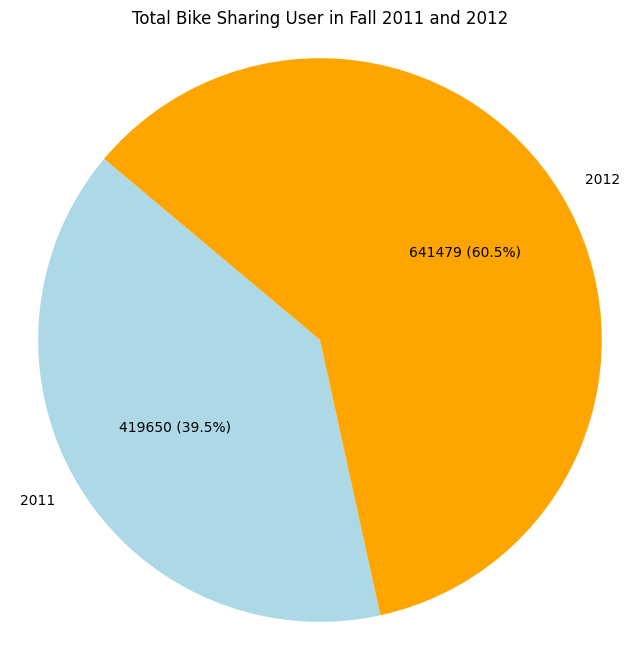

In [32]:
# Mengelompokkan data berdasarkan tahun, bulan, dan musim, kemudian menghitung jumlah pengguna bike sharing
monthly_usage = day_df.groupby(['yr', 'mnth', 'season'])['cnt'].sum().reset_index()

# Memilih data untuk musim 3 (Fall)
fall_usage = monthly_usage[monthly_usage['season'] == 3]

# Mengelompokkan data berdasarkan tahun, kemudian menghitung jumlah pengguna di musim gugur
fall_usage_yearly = fall_usage.groupby('yr')['cnt'].sum()

# Menyiapkan data untuk pie chart
labels = ['2011', '2012']
sizes = fall_usage_yearly.values

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=140, colors=['lightblue', 'orange'])
plt.title('Total Bike Sharing User in Fall 2011 and 2012')

# Menampilkan pie chart
plt.axis('equal')

plt.show()

In [33]:
# Menghitung persentase perubahan antara tahun 2011 dan 2012
total_2011 = fall_usage_yearly.loc[0]
total_2012 = fall_usage_yearly.loc[1]
percentage_change = ((total_2012 - total_2011) / total_2011) * 100

# Mencetak persentase perubahan
print("Persentase Perubahan antara Tahun 2011 dan 2012:", round(percentage_change), "%")

Persentase Perubahan antara Tahun 2011 dan 2012: 53 %


### Pertanyaan 2: Berapakah jumlah user bike sharing pada tahun 2011 dan 2012 berdasarkan kriteria tertentu seperti penggunaan sepeda pada weekdays, musim tertentu dan kondisi cuaca tertentu

Berdasarkan Weekday

In [34]:
# Mengelompokkan data berdasarkan weekday, kemudian menghitung total jumlah rental sepeda
byweekday_df = day_df.groupby('weekday')['cnt'].sum().reset_index()
byweekday_df.rename(columns={"cnt": "total_rental_bikes"}, inplace=True)

# Menampilkan DataFrame yang disederhanakan
print(byweekday_df)

   weekday  total_rental_bikes
0        0              444027
1        1              455503
2        2              469109
3        3              473048
4        4              485395
5        5              487790
6        6              477807


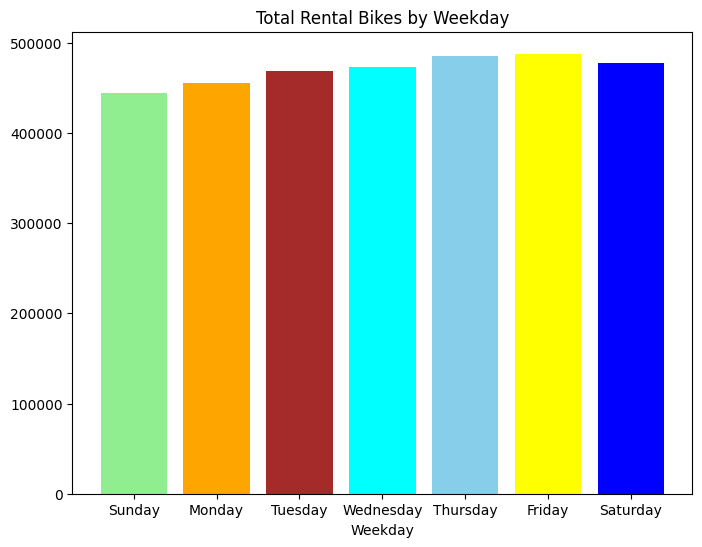

In [35]:
# Membuat daftar warna yang sesuai dengan setiap musim
colors = ['lightgreen', 'orange', 'brown', 'cyan', 'skyblue', 'yellow', 'blue']

# Membuat diagram batang dengan warna yang ditentukan untuk setiap musim
plt.figure(figsize=(8, 6))
plt.bar(byweekday_df['weekday'], byweekday_df['total_rental_bikes'], color=colors)
plt.title('Total Rental Bikes by Weekday')
plt.xlabel('Weekday')
plt.xticks(byweekday_df['weekday'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])  # Mengganti label sumbu x
plt.show()

Berdasarkan Musim

In [36]:
# Mengelompokkan data berdasarkan musim, kemudian menghitung total jumlah rental sepeda
byseason_df = day_df.groupby('season')['cnt'].sum().reset_index()
byseason_df.rename(columns={"cnt": "total_rental_bikes"}, inplace=True)

# Menampilkan DataFrame yang disederhanakan
print(byseason_df)

   season  total_rental_bikes
0       1              471348
1       2              918589
2       3             1061129
3       4              841613


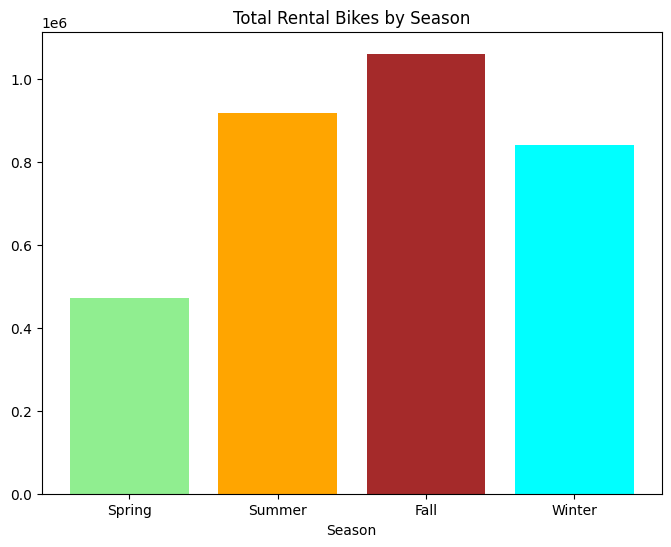

In [37]:
# Membuat daftar warna yang sesuai dengan setiap musim
colors = ['lightgreen', 'orange', 'brown', 'cyan']

# Membuat diagram batang dengan warna yang ditentukan untuk setiap musim
plt.figure(figsize=(8, 6))
plt.bar(byseason_df['season'], byseason_df['total_rental_bikes'], color=colors)
plt.title('Total Rental Bikes by Season')
plt.xlabel('Season')
plt.xticks(byseason_df['season'], ['Spring', 'Summer', 'Fall', 'Winter'])  # Mengganti label sumbu x
plt.show()

Berdasarkan Situasi Cuaca

In [38]:
# Mengelompokkan data berdasarkan situasi cuaca, kemudian menghitung total jumlah rental sepeda
byweathersit_df = day_df.groupby('weathersit')['cnt'].sum().reset_index()
byweathersit_df.rename(columns={"cnt": "total_rental_bikes"}, inplace=True)

# Menampilkan DataFrame yang disederhanakan
print(byweathersit_df)

   weathersit  total_rental_bikes
0           1             2257952
1           2              996858
2           3               37869


Karena pada output tidak menunjukkan situasi cuaca 4 yakni heavy rain maka pada diagram dibawah tidak dimasukkan ke dalam sintaks

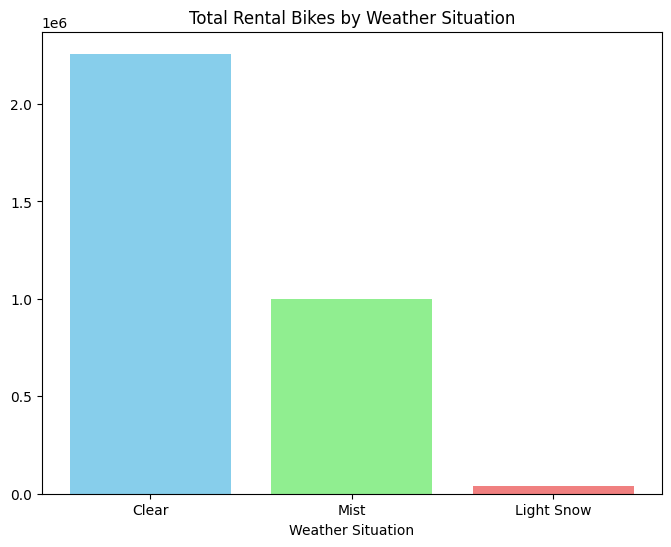

In [39]:
# Daftar warna sesuai dengan jumlah situasi cuaca
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightgrey']

# Membuat diagram batang dengan warna yang ditentukan untuk setiap situasi cuaca
plt.figure(figsize=(8, 6))
plt.bar(byweathersit_df['weathersit'], byweathersit_df['total_rental_bikes'], color=colors)
plt.title('Total Rental Bikes by Weather Situation')
plt.xlabel('Weather Situation')
plt.xticks(byweathersit_df['weathersit'], ['Clear', 'Mist', 'Light Snow'], rotation=0)
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : <br><br>
Diketahui bahwa user bike sharing tertinggi terjadi di musim 3 yakni musim gugur (Fall), yaitu pada tahun 2011 di bulan 7 yakni Juli dan pada tahun 2012 di bulan 8 yakni Agustus. Jika kita melihat berdasarkan musim gugur, pada pie chart terlihat peningkatan user bike sharing dari tahun 2011 ke tahun 2012. Pada tahun 2011 memiliki 419650 user dengan persentase sebesar 39,5% sementara pada tahun 2012 memiliki 641479 user dengan persentase sebesar 60,5%. Persentase perubahan antara tahun 2011 dan tahun 2012 sebesar 50,3%.

- Conclusion pertanyaan 2 : <br><br>
Dari grafik dan perhitungan yang didapatkan, terlihat bahwa :
1. Berdasarkan weekdays, total user bike sharing tertinggi pada tahun 2011 dan 2012 ada di hari jumat yakni 487790 user <br><br> 
2. Berdasarkan musim, total user bike sharing tertinggi pada tahun 2011 dan 2012 terjadi di musim gugur (Fall) yakni 1061129 user dengan urutan musim secara descending <br>
    a. Fall <br>
    b. Summer <br>
    c. Winter <br>
    D. Spring <br><br>
3. Berdasarkan situasi cuaca, total user bike sharing tertinggi pada tahun 2011 dan 2012 ada pada saat Clear (cerah) yakni 2257952 user dengan urutan cuaca secara descending <br>
    a. Clear, Few clouds, Partly cloudy <br>
    b. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
    c. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
    d. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (NONE)
